# Multiple linear regression.

Unlike the simple linear regression model, the multiple linear regression model is defined as any linear regression model with at least two explanatory variables. But what do we do when we have several variables? This is what we will see in this chapter. And you will finally be able to measure all the power of linear regression despite its simplicity!


## Variables studied

First of all, we will load our dataset. This is a fake Dataset for the example. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('./data/data_multi.csv')
df

,x_1,x_2,y
0,1.054452,-1.070753,-81.464433
1,-0.362741,-0.634322,-78.752795
2,-0.854096,0.313068,2.218414
3,1.326386,0.298238,52.234160
4,-0.461585,-1.315907,-159.639258
...,...,...,...
95,0.823504,0.771791,86.316340
96,0.976639,0.208275,83.136943
97,-1.347759,1.883151,157.404615
98,0.052165,-1.104383,-136.511136


In [36]:
df

,x_1,x_2,y
0,1.054452,-1.070753,-81.464433
1,-0.362741,-0.634322,-78.752795
2,-0.854096,0.313068,2.218414
3,1.326386,0.298238,52.234160
4,-0.461585,-1.315907,-159.639258
...,...,...,...
95,0.823504,0.771791,86.316340
96,0.976639,0.208275,83.136943
97,-1.347759,1.883151,157.404615
98,0.052165,-1.104383,-136.511136


In [37]:
df.shape


(100, 3)

As you can see we now have 100 rows, 2 features and 1 target.

**Exercise :** Create the x and y variables and define which column will be the target and which column will be the feature. 
Variables x and y must be of type `numpy.ndarray`. Therefore, our variable x has two dimensions this time.

In [38]:
X = np.array(df.iloc[:, :2].values)
y = np.array(df.iloc[:, -2]. values)
print(X.shape)
print(y.shape)

"""


y = df['y'].to_numpy()
x = df.drop(columns=['y'], axis=0).to_numpy()
print(y.shape)
print(x.shape)


"""

(100, 2)
(100,)


### Relationship between variables

To represent a dataset that has two features, we can use 3D visualization.

**Exercise :** Use a 3D matplotlib (or other) graph to view the dataset. 

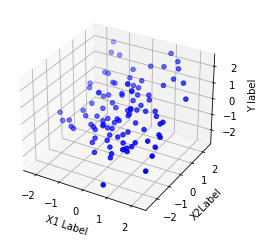

<Figure size 720x720 with 0 Axes>

In [39]:

from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

fig = plt.figure()
plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
x =X[:,0]
y =X[:,1]
z =y
ax.scatter(x, y, z, c='b', marker='o')
ax.set_xlabel('X1 Label')
ax.set_ylabel('X2Label') 
ax.zaxis.set_rotate_label(False)  # disable automatic rotation
ax.set_zlabel('Y label', rotation=90) 
plt.show()

If you change the camera angle, you should come across something that looks like this: 
<img src="./assets/3dplot.png" />

This appears to be a positive linear correlation. What do you say?  


If our dataset has more than two dimensions, then we won't be able to display it in 3D. Unfortunately for us, the human being can only perceive 3 dimensions. In this case, we will have no other choice than to display one scatter plot per variable.

And it is there that we realize that the linear regression may be very simple, as soon as we go beyond 3 dimensions, the human being will hardly be able to visualize all the data while the machines are doing very well.

**Exercise :** Use ``plt.tight_layout()`` method to display the point clouds for each variable

In [40]:
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

**Exercise :** Show correlation coefficients. 

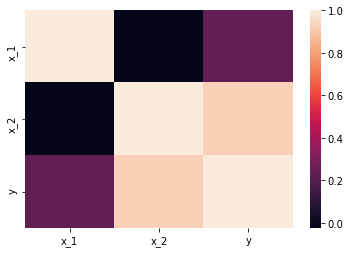

          x_1       x_2         y
x_1  1.000000 -0.024005  0.235650
x_2 -0.024005  1.000000  0.930299
y    0.235650  0.930299  1.000000


In [41]:
import seaborn as sns

correlations = df.corr()
sns.heatmap(correlations)
plt.show()
print(correlations)

### Split the dataset

You now know the process!

**Exercise :** Import train_test_split from sklearn and split the dataset and create the variables X_train, X_test, y_train, y_test.

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(80, 2)
(80,)
(20, 2)
(20,)


##  Load and fit the model (with Sklearn)

Then how to make with the sklearn model ? Well, it's simple, you don't change anything. Sklearn takes care of everything for you.

1. Import LinearRegression from sklearn
2. Create a regressor variable and instantiate your LinearRegression class.
3. Train your model with X_train and y_train
4. Display the score of your model with X_train and y_train.
5. Use the predict method of your model on your test dataset (X_test).
6. Display the score of your model with X_test and y_test.

In [43]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

print('intercept=',regressor.intercept_)
print('coef_=',regressor.coef_)
regressor.score(X_train, y_train)

intercept= 2.0816681711721685e-17
coef_= [-2.92961805e-16  1.00000000e+00]


1.0

In [44]:
y_pred = regressor.predict(X_test)

In [45]:
regressor.score(X_test, y_test)

1.0

And voilà !

## From Scratch 
You will see that with matrices, it doesn't change much in the way of proceeding. Matrix writing, moreover, remains the same as simple regression. 

### Transform to matrix

$$
\\ Y = X . \theta \\
$$
The $Y$ vector is the same too
$$ Y =
\begin{bmatrix}
y^{(1)}\\
y^{(2)}\\
y^{(3)}\\
... \\
y^{(m)}\\
\end{bmatrix}
$$

The $X$ matrix will have as many dimensions as there are features +1  (n+1)

$$ X =
\begin{bmatrix}
x^{(1)}_1, x^{(1)}_2, ..., x^{(m)}_{n}, 1\\
x^{(2)}_1, x^{(2)}_2, ..., x^{(m)}_{n}, 1\\
x^{(3)}_1, x^{(3)}_2, ..., x^{(m)}_{n}, 1\\
x^{(m)}_1,x^{(m)}_2, ..., x^{(m)}_{n}, 1\\
\end{bmatrix}
$$

The theta vector will have as many lines as there are characteristics +1 (for the constant). 
$$ \theta =
\begin{bmatrix}
a\\
b\\
c\\
... \\
\end{bmatrix}
$$

For our case with our dataset, we can write it like this: 

$$
\begin{bmatrix}
y^{(1)}\\
y^{(2)}\\
y^{(3)}\\
... \\
y^{(m)}\\
\end{bmatrix}
=
\begin{bmatrix}
x^{(1)}_1, x^{(1)}_2, 1\\
x^{(2)}_1, x^{(2)}_2, 1\\
x^{(3)}_1, x^{(3)}_2, 1\\
x^{(m)}_1,x^{(m)}_2,  1\\
\end{bmatrix}
.
\begin{bmatrix}
a\\
b\\
c\\
\end{bmatrix}
$$

**Exercise :** Create a variable X which contains a matrix (100,3) with two column's filled with values of our dataframe and then another one with 1's.

In [46]:
X = np.array(df.iloc[:,:].values)
y = np.array(df.iloc[:, 2].values)
ones = np.ones(100, dtype=int)

#print(X)
X[:,2]=ones
#X = np.concatenate((X,y),axis=1)
#Z = np.concatenate((X,ones.reshape(100,1)),axis=1)
#print(X)
#print(Z)

**Exercise :** Check that your matrix is of shape (100,3) 

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(80, 3)
(80,)
(20, 3)
(20,)


**Exercise :** Create the theta vector with three random values. Your vector must be of dimension 
(3,1)

In [48]:
print(X.shape)

(100, 3)


## Create and fit the model
### Define your model

**Exercise :** Create a model function that receives as parameter X and theta. The function must return the vector Y. This is exactly the same model as last time. 

In [49]:
def model(X,theta):
    F = X.dot(theta)
    return F

### Cost function

Well we have the model, the theta vector, the X matrix. What are we missing? The cost function of course!
And you know what? This too is exactly the same MSE function from last time. 

$$MSE(\theta) = \frac {1}{2m}  \sum _ {i=1}^m (X . \theta - y)^2$$

**Exercise :** Create a MSE function that receives in parameter X, y and theta using the example above.

In [50]:
def MSE(X,y,theta):  
    sigma = np.sum(np.power((X.dot(theta)-y),2))
    mse = 1/(2*len(y))*sigma 
    return mse

y    5789.494029
dtype: float64

### Gradient descent
It's time to find the minimum of our function. Well again, nothing changes compared to the last time. 

$$ \frac {\partial MSE(\theta) }{\partial \theta}  = \frac {1}{m} X^T.(X.\theta - y)$$

**Exercise :** Create a grad function that receives as parameter X, y, theta.

In [51]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X,theta) - y)

In [52]:
test = grad(X, y, theta)
print(test)

NameError: name 'theta' is not defined

**Exercise :**

1. Create a `gradient_descent` function that receives as parameter `X`, `y`, `theta`, `learning_rate`, `n_iterations`
2. In the function, create a variable `cost_history` with a matrix filled with 0 and which has a length of `n_iterations`. We will use it to display the histogram of the model learning process.
3. Create a loop that iterates up to `n_iterations`
4. In the loop, update `theta` with the formula of the gradient descent (The example above)
5. In the loop, update `cost_history[i]` with the values of `MSE(X,y,theta)`
6. return `theta` and `cost_history`

In [53]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations)   
    for i in range(n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)
        cost_history[i] = MSE(X,y,theta)
    return theta, cost_history

### Train your model 

**Exercise :** Create variables n_iterations and learning_rate.

In [54]:
n_iterations  = 1000
learning_rate = 0.01

**Exercise:** Create variables theta_final, cost history and instance gradient_descent().

In [55]:
#predictions = model(X,theta_final)
predictions = model(X,theta_final)
pred_y_test = model(X_test,theta_final)

NameError: name 'theta_final' is not defined

**Exercise :** 
Create a predictions variable that contains model(X, theta_final).



In [56]:
#predictions = model(X,theta_final)
predictions = model(X,theta_final)
pred_y_test = model(X_test,theta_final)

NameError: name 'theta_final' is not defined

**Exercise :** Project in 3d your predictions and the true values of the dataset

NameError: name 'predictions' is not defined

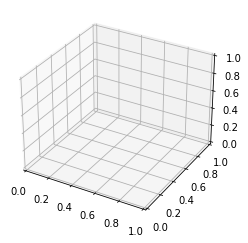

<Figure size 720x720 with 0 Axes>

In [57]:
fig = plt.figure()
plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
sx =X[:,0]
sy =X[:,1]
sz =predictions
ss =pred_y_test
#ax.scatter(sx, sy, ss, c='c', marker='o')
ax.scatter(sx, sy, sz, c='r', marker='+')
ax.set_xlabel('X1 Label')
ax.set_ylabel('X2Label')
ax.set_zlabel('Y label', rotation=45) 
ax.azim = 225
plt.show()

**Exercise :** Plot cost_history

In [58]:
iter = np.arange(n_iterations)
plt.plot(iter,cost_history, c='c')
plt.xlabel('n_iterations')
plt.ylabel('cost_history')
plt.grid(True)
plt.show()

NameError: name 'cost_history' is not defined

### Evaluation

In [282]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [283]:
coef_determination(y, predictions)

y    0.93205
dtype: float64

In [ ]:
coef_determination(y_test, pred_y_test)

### Congratulations !

You are now able to create a multiple variable regression model from scratch, well, from the matrix!

<img src="https://media.giphy.com/media/W9lzJDwciz6bS/giphy.gif">